Цилих А.
Карлышев А.
>М19-ИВТ-3

Исходный код по ссылке:

https://colab.research.google.com/drive/1iC3IirfkT9mVOXMR_LHu1IVvOtdtyJQG?usp=sharing

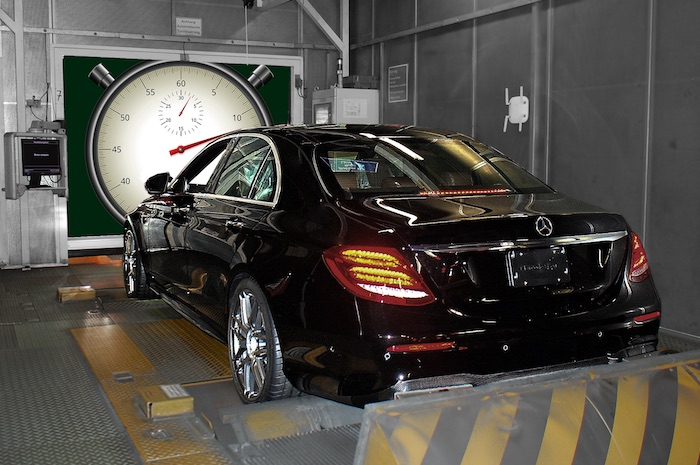

Задача предсказать время необходимое для тестирования авто на стенде

In [ ]:
#загрузка с диска
#монтируем диск
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
#проверям
!df -h
!ls /content/gdrive/"My Drive"/"лабораторная 1"

Mounted at /content/gdrive
Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   31G   35G  47% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
tmpfs           6.4G   16K  6.4G   1% /var/colab
/dev/sda1        75G   32G   44G  43% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  381M   15G   3% /content/gdrive
test.csv  train.csv


In [ ]:
#копируем с диска
!cp /content/gdrive/'My Drive'/"лабораторная 1"/test.csv .
!cp /content/gdrive/'My Drive'/"лабораторная 1"/train.csv .
!ls

gdrive	sample_data  test.csv  train.csv


In [ ]:
#читаем в переменную
import pandas as pd
import numpy as np
# train = pd.read_csv('train.csv').drop(['y','ID','X0','X1','X2','X3','X4','X5','X6','X8'], axis='columns')
train = pd.read_csv('train.csv').drop(['y','ID'], axis='columns')
a_train = pd.read_csv('train.csv')['y']
test = np.array(pd.read_csv('test.csv'))
print(train)
print(a_train)

      X0 X1  X2 X3 X4  X5 X6 X8  ...  X377  X378  X379  X380  X382  X383  X384  X385
0      k  v  at  a  d   u  j  o  ...     1     0     0     0     0     0     0     0
1      k  t  av  e  d   y  l  o  ...     0     0     0     0     0     0     0     0
2     az  w   n  c  d   x  j  x  ...     0     0     0     0     1     0     0     0
3     az  t   n  f  d   x  l  e  ...     0     0     0     0     0     0     0     0
4     az  v   n  f  d   h  d  n  ...     0     0     0     0     0     0     0     0
...   .. ..  .. .. ..  .. .. ..  ...   ...   ...   ...   ...   ...   ...   ...   ...
4204  ak  s  as  c  d  aa  d  q  ...     0     0     0     0     0     0     0     0
4205   j  o   t  d  d  aa  h  h  ...     0     0     0     0     0     0     0     0
4206  ak  v   r  a  d  aa  g  e  ...     1     0     0     0     0     0     0     0
4207  al  r   e  f  d  aa  l  u  ...     0     0     0     0     0     0     0     0
4208   z  r  ae  c  d  aa  g  w  ...     0     0     0     0     

In [ ]:
#следует модернизировать буквенные индексы  цифрами
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(train['X0'])
train['X0'] = label_encoder.transform(train['X0']) 
label_encoder.fit(train['X1'])
train['X1'] = label_encoder.transform(train['X1'])
label_encoder.fit(train['X2'])
train['X2'] = label_encoder.transform(train['X2'])
label_encoder.fit(train['X3'])
train['X3'] = label_encoder.transform(train['X3'])
label_encoder.fit(train['X4'])
train['X4'] = label_encoder.transform(train['X4'])
label_encoder.fit(train['X5'])
train['X5'] = label_encoder.transform(train['X5'])
label_encoder.fit(train['X6'])
train['X6'] = label_encoder.transform(train['X6'])
label_encoder.fit(train['X8'])
train['X8'] = label_encoder.transform(train['X8'])
print(train)

      X0  X1  X2  X3  X4  X5  X6  ...  X378  X379  X380  X382  X383  X384  X385
0     32  23  17   0   3  24   9  ...     0     0     0     0     0     0     0
1     32  21  19   4   3  28  11  ...     0     0     0     0     0     0     0
2     20  24  34   2   3  27   9  ...     0     0     0     1     0     0     0
3     20  21  34   5   3  27  11  ...     0     0     0     0     0     0     0
4     20  23  34   5   3  12   3  ...     0     0     0     0     0     0     0
...   ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   ...   ...   ...   ...   ...
4204   8  20  16   2   3   0   3  ...     0     0     0     0     0     0     0
4205  31  16  40   3   3   0   7  ...     0     0     0     0     0     0     0
4206   8  23  38   0   3   0   6  ...     0     0     0     0     0     0     0
4207   9  19  25   5   3   0  11  ...     0     0     0     0     0     0     0
4208  46  19   3   2   3   0   6  ...     0     0     0     0     0     0     0

[4209 rows x 376 columns]


В полученных данных имеем 385 параметра Х и предсказываемое значение У, а также ID записи. Из 385 признаков 8 категориальных (они принимают значения в виде буквы) Данные подготовлены и готовы к работе.

In [ ]:
#тут, героически, следует разбить датасет на части (проверка и учеба)
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(train, a_train, test_size=0.25, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
def build_model():
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(train.shape[1],)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# #модель
# model = Sequential()
# model.add(Dense(128, activation='relu', input_shape=(train.shape[1],)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# тренировочка
ep = 15
model = build_model()
H = model.fit(x_train, y_train, epochs=ep, batch_size=1, verbose=2, validation_split = 0.2)

Epoch 1/15
2524/2524 - 5s - loss: 304.0982 - mae: 10.5978 - val_loss: 98.8463 - val_mae: 7.6694
Epoch 2/15
2524/2524 - 4s - loss: 93.1781 - mae: 6.4507 - val_loss: 79.0013 - val_mae: 5.9617
Epoch 3/15
2524/2524 - 4s - loss: 88.2618 - mae: 6.1796 - val_loss: 77.4669 - val_mae: 5.8256
Epoch 4/15
2524/2524 - 4s - loss: 84.7839 - mae: 6.0277 - val_loss: 85.3978 - val_mae: 6.3132
Epoch 5/15
2524/2524 - 4s - loss: 81.9987 - mae: 5.9030 - val_loss: 74.8208 - val_mae: 6.2838
Epoch 6/15
2524/2524 - 4s - loss: 81.0931 - mae: 5.8421 - val_loss: 77.0436 - val_mae: 6.7356
Epoch 7/15
2524/2524 - 4s - loss: 81.7405 - mae: 5.9206 - val_loss: 71.0892 - val_mae: 5.7811
Epoch 8/15
2524/2524 - 4s - loss: 78.7173 - mae: 5.7794 - val_loss: 73.3281 - val_mae: 5.6403
Epoch 9/15
2524/2524 - 4s - loss: 77.8679 - mae: 5.7714 - val_loss: 85.7902 - val_mae: 5.7240
Epoch 10/15
2524/2524 - 4s - loss: 78.3688 - mae: 5.6720 - val_loss: 75.7641 - val_mae: 6.4961
Epoch 11/15
2524/2524 - 4s - loss: 76.0170 - mae: 5.7106 

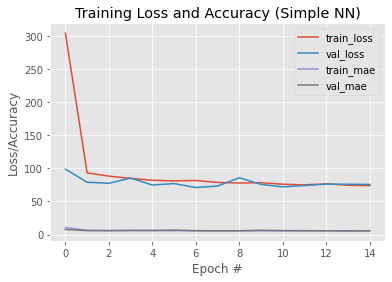

In [ ]:
import matplotlib.pyplot as plt
# строим графики потерь и точности
N = np.arange(0, ep)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["mae"], label="train_mae")
plt.plot(N, H.history["val_mae"], label="val_mae")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("plot.jpg")
plt.show()

In [ ]:
# тестим
mse, mae = model.evaluate(x_test, y_test, verbose=0)
pred = model.predict(x_test)

In [ ]:
print("Средняя абсолютная ошибка:", mae)

Средняя абсолютная ошибка: 5.729278087615967


In [ ]:
print("Предсказание:", pred[3][0], ", факт:", y_train[3])

Предсказание: 78.926834 , факт: 80.62


In [ ]:
pip install -U keras-tuner

     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=fce4751126795f1c4406efd9da149aac59c3a1888d418561e5649830b2211777
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=a8e1e831c1ec5d21eee3cb6b832378416a5374e1b2dcd6ef945423f2cf6bf956
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from google.colab import files
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import numpy as np

In [ ]:
def build_model1(hp):
  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])
  model = Sequential()
  model.add(Dense(units=hp.Int('units_input',    # Полносвязный слой с разным количеством нейронов
                                   min_value=512,    # минимальное количество нейронов - 128
                                   max_value=1024,   # максимальное количество - 1024
                                   step=32),
                    input_shape=(train.shape[1],),
                    activation=activation_choice))
  model.add(Dense(units=hp.Int('units_hidden',        
                                   min_value=128,   
                                   max_value=600,   
                                   step=32),
                    activation=activation_choice))
  model.add(Dense(1))
  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']), loss='mse', metrics=['mae'])
  return model

In [ ]:
tuner = RandomSearch(
    build_model1,
    objective='val_mae',
    max_trials=80,
    project_name='helloworld',
    directory='my_dir')

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.search(x_train,                  # Данные для обучения
             y_train,                  # Правильные ответы
             batch_size=256,           # Размер мини-выборки
             epochs=ep,                # Количество эпох обучения 
             validation_split=0.2,     # Часть данных, которая будет использоваться для проверки
             )

Epoch 1/15
10/10 [==============================] - 0s 27ms/step - loss: 7669.0469 - mae: 86.5012 - val_loss: 7048.4028 - val_mae: 83.0054
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 6908.5332 - mae: 82.1332 - val_loss: 6739.9321 - val_mae: 81.1263
Epoch 3/15
10/10 [==============================] - 0s 8ms/step - loss: 6621.3965 - mae: 80.3666 - val_loss: 6471.3154 - val_mae: 79.4536
Epoch 4/15
10/10 [==============================] - 0s 7ms/step - loss: 6359.9170 - mae: 78.7266 - val_loss: 6217.0928 - val_mae: 77.8374
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 6109.9287 - mae: 77.1205 - val_loss: 5971.7280 - val_mae: 76.2450
Epoch 6/15
10/10 [==============================] - 0s 7ms/step - loss: 5867.2197 - mae: 75.5332 - val_loss: 5732.3315 - val_mae: 74.6586
Epoch 7/15
10/10 [==============================] - 0s 7ms/step - loss: 5630.5640 - mae: 73.9478 - val_loss: 5498.7397 - val_mae: 73.0775
Epoch 8/15
10/10 [===============

Epoch 1/15
10/10 [==============================] - 0s 23ms/step - loss: 47722.9531 - mae: 159.7356 - val_loss: 158.4856 - val_mae: 10.0458
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 163.5520 - mae: 10.1344 - val_loss: 158.4889 - val_mae: 9.9825
Epoch 3/15
10/10 [==============================] - 0s 6ms/step - loss: 162.0143 - mae: 10.0893 - val_loss: 158.6077 - val_mae: 10.0729
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: 162.5325 - mae: 10.0993 - val_loss: 158.6353 - val_mae: 10.0777
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 163.4469 - mae: 10.1430 - val_loss: 158.6245 - val_mae: 9.9645
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 163.5004 - mae: 10.1292 - val_loss: 162.3537 - val_mae: 10.3729
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: 162.6759 - mae: 10.1295 - val_loss: 158.6315 - val_mae: 10.0771
Epoch 8/15
10/10 [============================

Epoch 1/15
10/10 [==============================] - 0s 23ms/step - loss: 25402.1055 - mae: 105.1272 - val_loss: 158.6326 - val_mae: 10.0773
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 162.0262 - mae: 10.0763 - val_loss: 158.5692 - val_mae: 10.0657
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 162.4853 - mae: 10.1120 - val_loss: 159.5342 - val_mae: 9.9283
Epoch 4/15
10/10 [==============================] - 0s 6ms/step - loss: 162.4714 - mae: 10.0965 - val_loss: 158.4289 - val_mae: 10.0024
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: 162.4819 - mae: 10.1008 - val_loss: 158.4746 - val_mae: 10.0429
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 162.2732 - mae: 10.1033 - val_loss: 159.0742 - val_mae: 9.9395
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: 162.4668 - mae: 10.1109 - val_loss: 158.8310 - val_mae: 9.9496
Epoch 8/15
10/10 [=============================

Epoch 1/15
10/10 [==============================] - 0s 23ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 3616.5701 - mae: 51.7170 - val_loss: 462.8517 - val_mae: 18.3604
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 805.4506 - mae: 23.6197 - val_loss: 389.9589 - val_mae: 16.7239
Epoch 3/15
10/10 [==============================] - 0s 9ms/step - loss: 411.1831 - mae: 16.0068 - val_loss: 374.1605 - val_mae: 15.0531
Epoch 4/15
10/10 [==============================] - 0s 9ms/step - loss: 308.3257 - mae: 13.7406 - val_loss: 284.1249 - val_mae: 13.9468
Epoch 5/15
10/10 [==============================] - 0s 9ms/step - loss: 252.6163 - mae: 12.3804 - val_loss: 205.2601 - val_mae: 11.4353
Epoch 6/15
10/10 [==============================] - 0s 8ms/step - loss: 207.6213 - mae: 10.8993 - val_loss: 181.4081 - val_mae: 10.7103
Epoch 7/15
10/10 [==============================] - 0s 9ms/step - loss: 179.8142 - mae: 10.1254 - val_loss: 163.0825 - val_mae: 10.1135
Epoch 8/15
10/10 [============================

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 6552.7847 - mae: 79.4504 - val_loss: 5319.0864 - val_mae: 71.8373
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 5048.0410 - mae: 69.8796 - val_loss: 4704.3496 - val_mae: 67.4235
Epoch 3/15
10/10 [==============================] - 0s 22ms/step - loss: 4447.9297 - mae: 65.4452 - val_loss: 4127.4971 - val_mae: 63.0006
Epoch 4/15
10/10 [==============================] - 0s 25ms/step - loss: 3892.7590 - mae: 61.0675 - val_loss: 3602.7883 - val_mae: 58.6887
Epoch 5/15
10/10 [==============================] - 0s 21ms/step - loss: 3391.7715 - mae: 56.8180 - val_loss: 3131.2527 - val_mae: 54.5237
Epoch 6/15
10/10 [==============================] - 0s 26ms/step - loss: 2943.1025 - mae: 52.7263 - val_loss: 2711.1865 - val_mae: 50.5249
Epoch 7/15
10/10 [==============================] - 0s 21ms/step - loss: 2544.2708 - mae: 48.8059 - val_loss: 2339.4402 - val_mae: 46.7014
Epoch 8/15
10/10 [==========

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 2035.7563 - mae: 33.0392 - val_loss: 305.0168 - val_mae: 14.4948
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 278.0118 - mae: 13.1115 - val_loss: 221.0242 - val_mae: 11.9482
Epoch 3/15
10/10 [==============================] - 0s 6ms/step - loss: 238.0746 - mae: 11.9105 - val_loss: 226.4636 - val_mae: 12.3713
Epoch 4/15
10/10 [==============================] - 0s 7ms/step - loss: 171.2807 - mae: 9.7611 - val_loss: 135.1280 - val_mae: 9.0586
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 210.9967 - mae: 11.1192 - val_loss: 115.1411 - val_mae: 8.0789
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 149.7158 - mae: 8.9770 - val_loss: 161.3167 - val_mae: 10.7133
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: 149.6073 - mae: 9.0770 - val_loss: 174.2172 - val_mae: 11.3490
Epoch 8/15
10/10 [==============================] -

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 9121.7881 - mae: 94.5877 - val_loss: 8304.3350 - val_mae: 90.2549
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 8148.2217 - mae: 89.3627 - val_loss: 7972.6431 - val_mae: 88.3981
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 7845.5205 - mae: 87.6526 - val_loss: 7682.9224 - val_mae: 86.7439
Epoch 4/15
10/10 [==============================] - 0s 29ms/step - loss: 7560.3257 - mae: 86.0121 - val_loss: 7403.8262 - val_mae: 85.1199
Epoch 5/15
10/10 [==============================] - 0s 11ms/step - loss: 7285.4336 - mae: 84.3974 - val_loss: 7133.4414 - val_mae: 83.5166
Epoch 6/15
10/10 [==============================] - 0s 18ms/step - loss: 7017.3940 - mae: 82.7966 - val_loss: 6868.7720 - val_mae: 81.9167
Epoch 7/15
10/10 [==============================] - 0s 18ms/step - loss: 6755.3140 - mae: 81.1974 - val_loss: 6608.6885 - val_mae: 80.3136
Epoch 8/15
10/10 [==========

Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 126465.1562 - mae: 225.6882 - val_loss: 158.6229 - val_mae: 10.0757
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 162.2831 - mae: 10.0952 - val_loss: 158.4356 - val_mae: 10.0275
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: 162.0689 - mae: 10.0884 - val_loss: 158.4619 - val_mae: 10.0388
Epoch 4/15
10/10 [==============================] - 0s 6ms/step - loss: 162.0701 - mae: 10.0797 - val_loss: 158.8990 - val_mae: 10.1156
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 162.2355 - mae: 10.1078 - val_loss: 159.0138 - val_mae: 9.9417
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: 162.3113 - mae: 10.0802 - val_loss: 158.4904 - val_mae: 10.0475
Epoch 7/15
10/10 [==============================] - 0s 6ms/step - loss: 162.4319 - mae: 10.0903 - val_loss: 159.1848 - val_mae: 10.1490
Epoch 8/15
10/10 [==========================

Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 1515.2240 - mae: 26.7987 - val_loss: 322.0062 - val_mae: 14.0082
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 387.4365 - mae: 15.8508 - val_loss: 275.2695 - val_mae: 12.7660
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 254.9993 - mae: 12.5009 - val_loss: 564.3016 - val_mae: 21.0147
Epoch 4/15
10/10 [==============================] - 0s 11ms/step - loss: 246.1725 - mae: 11.9672 - val_loss: 162.0071 - val_mae: 9.2712
Epoch 5/15
10/10 [==============================] - 0s 20ms/step - loss: 250.1220 - mae: 12.5202 - val_loss: 132.9325 - val_mae: 8.2394
Epoch 6/15
10/10 [==============================] - 0s 7ms/step - loss: 195.1380 - mae: 10.9811 - val_loss: 188.8977 - val_mae: 10.2728
Epoch 7/15
10/10 [==============================] - 0s 6ms/step - loss: 183.1481 - mae: 10.7279 - val_loss: 161.2446 - val_mae: 9.1817
Epoch 8/15
10/10 [=============================

Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 6351.9790 - mae: 78.3132 - val_loss: 5484.2251 - val_mae: 72.9765
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 5249.4873 - mae: 71.3148 - val_loss: 4970.6636 - val_mae: 69.3697
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 4774.2109 - mae: 67.9081 - val_loss: 4530.4771 - val_mae: 66.1212
Epoch 4/15
10/10 [==============================] - 0s 12ms/step - loss: 4351.1421 - mae: 64.7172 - val_loss: 4125.9248 - val_mae: 62.9880
Epoch 5/15
10/10 [==============================] - 0s 14ms/step - loss: 3957.8606 - mae: 61.6074 - val_loss: 3745.8647 - val_mae: 59.8952
Epoch 6/15
10/10 [==============================] - 0s 10ms/step - loss: 3587.9480 - mae: 58.5211 - val_loss: 3387.7766 - val_mae: 56.8274
Epoch 7/15
10/10 [==============================] - 0s 8ms/step - loss: 3238.7839 - mae: 55.4591 - val_loss: 3049.5796 - val_mae: 53.7695
Epoch 8/15
10/10 [===========

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 3743.8135 - mae: 51.9615 - val_loss: 739.8401 - val_mae: 23.0769
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 842.5311 - mae: 23.9124 - val_loss: 359.0875 - val_mae: 15.4261
Epoch 3/15
10/10 [==============================] - 0s 20ms/step - loss: 486.8755 - mae: 17.3306 - val_loss: 319.4123 - val_mae: 14.1671
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: 321.7714 - mae: 14.1835 - val_loss: 302.6826 - val_mae: 14.4601
Epoch 5/15
10/10 [==============================] - 0s 8ms/step - loss: 253.5476 - mae: 12.3471 - val_loss: 226.7590 - val_mae: 11.8363
Epoch 6/15
10/10 [==============================] - 0s 10ms/step - loss: 217.6187 - mae: 11.2447 - val_loss: 198.6244 - val_mae: 11.3981
Epoch 7/15
10/10 [==============================] - 0s 13ms/step - loss: 182.4514 - mae: 10.1620 - val_loss: 163.7377 - val_mae: 9.9667
Epoch 8/15
10/10 [==========================

Epoch 1/15
10/10 [==============================] - 0s 22ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 23ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 1319.6533 - mae: 23.1119 - val_loss: 159.1292 - val_mae: 10.1421
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 163.9553 - mae: 10.1302 - val_loss: 158.8542 - val_mae: 9.9491
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: 162.3592 - mae: 10.1040 - val_loss: 158.4516 - val_mae: 10.0346
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: 163.2441 - mae: 10.1110 - val_loss: 160.8431 - val_mae: 10.2834
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: 171.5574 - mae: 10.3307 - val_loss: 158.4238 - val_mae: 10.0262
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 163.4952 - mae: 10.1271 - val_loss: 165.4352 - val_mae: 9.9581
Epoch 7/15
10/10 [==============================] - 0s 6ms/step - loss: 164.7643 - mae: 10.1551 - val_loss: 162.6655 - val_mae: 9.9307
Epoch 8/15
10/10 [==============================]

Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 52950.2422 - mae: 161.8739 - val_loss: 158.9010 - val_mae: 10.1159
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 162.4962 - mae: 10.1168 - val_loss: 158.9498 - val_mae: 9.9441
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: 163.3157 - mae: 10.1123 - val_loss: 158.6063 - val_mae: 9.9660
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: 162.4338 - mae: 10.0873 - val_loss: 159.1086 - val_mae: 10.1407
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: 162.4697 - mae: 10.1085 - val_loss: 158.4733 - val_mae: 9.9855
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 162.5170 - mae: 10.1022 - val_loss: 158.6692 - val_mae: 9.9602
Epoch 7/15
10/10 [==============================] - 0s 7ms/step - loss: 162.7196 - mae: 10.1032 - val_loss: 159.9469 - val_mae: 9.9243
Epoch 8/15
10/10 [==============================]

Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 8631.3164 - mae: 91.9039 - val_loss: 7547.5698 - val_mae: 85.9603
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 7334.9404 - mae: 84.6910 - val_loss: 7102.0596 - val_mae: 83.3285
Epoch 3/15
10/10 [==============================] - 0s 20ms/step - loss: 6935.9722 - mae: 82.3000 - val_loss: 6724.8213 - val_mae: 81.0333
Epoch 4/15
10/10 [==============================] - 0s 19ms/step - loss: 6562.7104 - mae: 80.0032 - val_loss: 6357.7222 - val_mae: 78.7356
Epoch 5/15
10/10 [==============================] - 0s 19ms/step - loss: 6199.9712 - mae: 77.7010 - val_loss: 6000.1787 - val_mae: 76.4314
Epoch 6/15
10/10 [==============================] - 0s 15ms/step - loss: 5850.4307 - mae: 75.4201 - val_loss: 5661.1343 - val_mae: 74.1803
Epoch 7/15
10/10 [==============================] - 0s 19ms/step - loss: 5518.2363 - mae: 73.1812 - val_loss: 5335.8574 - val_mae: 71.9544
Epoch 8/15
10/10 [==========

Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 6340.7764 - mae: 76.3730 - val_loss: 1568.0107 - val_mae: 35.8589
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 1018.2355 - mae: 26.4604 - val_loss: 1193.6161 - val_mae: 29.2235
Epoch 3/15
10/10 [==============================] - 0s 9ms/step - loss: 604.9397 - mae: 19.6624 - val_loss: 506.5639 - val_mae: 17.6396
Epoch 4/15
10/10 [==============================] - 0s 9ms/step - loss: 437.7137 - mae: 16.2409 - val_loss: 283.1934 - val_mae: 13.7104
Epoch 5/15
10/10 [==============================] - 0s 8ms/step - loss: 292.1072 - mae: 13.4523 - val_loss: 220.9330 - val_mae: 11.7691
Epoch 6/15
10/10 [==============================] - 0s 9ms/step - loss: 213.3133 - mae: 10.8380 - val_loss: 179.8268 - val_mae: 10.5498
Epoch 7/15
10/10 [==============================] - 0s 9ms/step - loss: 169.9445 - mae: 9.7334 - val_loss: 155.5929 - val_mae: 9.4836
Epoch 8/15
10/10 [===========================

Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 2488.6350 - mae: 37.3270 - val_loss: 303.5755 - val_mae: 14.4658
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 270.1235 - mae: 12.8174 - val_loss: 226.9449 - val_mae: 12.4046
Epoch 3/15
10/10 [==============================] - 0s 9ms/step - loss: 241.9569 - mae: 12.0606 - val_loss: 191.9632 - val_mae: 11.3776
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: 243.9226 - mae: 12.4393 - val_loss: 208.7884 - val_mae: 12.1438
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 182.8953 - mae: 10.3232 - val_loss: 272.6541 - val_mae: 14.3339
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 187.5286 - mae: 10.5274 - val_loss: 202.5756 - val_mae: 12.1697
Epoch 7/15
10/10 [==============================] - 0s 7ms/step - loss: 211.1514 - mae: 11.6050 - val_loss: 151.8714 - val_mae: 10.2161
Epoch 8/15
10/10 [============================

Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 8967.7422 - mae: 93.7970 - val_loss: 8380.9219 - val_mae: 90.6781
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 8296.5107 - mae: 90.1916 - val_loss: 8200.7061 - val_mae: 89.6788
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 8133.0747 - mae: 89.2806 - val_loss: 8044.8535 - val_mae: 88.8056
Epoch 4/15
10/10 [==============================] - 0s 20ms/step - loss: 7978.7510 - mae: 88.4131 - val_loss: 7892.4873 - val_mae: 87.9435
Epoch 5/15
10/10 [==============================] - 0s 9ms/step - loss: 7827.4717 - mae: 87.5523 - val_loss: 7741.0840 - val_mae: 87.0785
Epoch 6/15
10/10 [==============================] - 0s 15ms/step - loss: 7676.5571 - mae: 86.6855 - val_loss: 7591.6636 - val_mae: 86.2162
Epoch 7/15
10/10 [==============================] - 0s 20ms/step - loss: 7528.3223 - mae: 85.8271 - val_loss: 7445.0488 - val_mae: 85.3617
Epoch 8/15
10/10 [===========

Epoch 1/15
10/10 [==============================] - 0s 27ms/step - loss: 2313.8257 - mae: 38.6823 - val_loss: 424.1120 - val_mae: 17.3582
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 516.0602 - mae: 18.3305 - val_loss: 248.9339 - val_mae: 12.6631
Epoch 3/15
10/10 [==============================] - 0s 22ms/step - loss: 311.7494 - mae: 13.8248 - val_loss: 199.2674 - val_mae: 11.1914
Epoch 4/15
10/10 [==============================] - 0s 28ms/step - loss: 214.1008 - mae: 10.9749 - val_loss: 170.2416 - val_mae: 10.4594
Epoch 5/15
10/10 [==============================] - 0s 27ms/step - loss: 163.2872 - mae: 9.6493 - val_loss: 140.5206 - val_mae: 9.0535
Epoch 6/15
10/10 [==============================] - 0s 27ms/step - loss: 133.8577 - mae: 8.3173 - val_loss: 123.8510 - val_mae: 8.6291
Epoch 7/15
10/10 [==============================] - 0s 33ms/step - loss: 116.0196 - mae: 7.5607 - val_loss: 109.0486 - val_mae: 7.7076
Epoch 8/15
10/10 [=============================

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 9040.7109 - mae: 94.1924 - val_loss: 8690.8105 - val_mae: 92.3711
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 8619.9180 - mae: 91.9662 - val_loss: 8532.7236 - val_mae: 91.5113
Epoch 3/15
10/10 [==============================] - 0s 8ms/step - loss: 8474.0117 - mae: 91.1695 - val_loss: 8398.7354 - val_mae: 90.7762
Epoch 4/15
10/10 [==============================] - 0s 9ms/step - loss: 8344.4268 - mae: 90.4574 - val_loss: 8272.8564 - val_mae: 90.0802
Epoch 5/15
10/10 [==============================] - 0s 8ms/step - loss: 8220.2930 - mae: 89.7673 - val_loss: 8150.3853 - val_mae: 89.3978
Epoch 6/15
10/10 [==============================] - 0s 9ms/step - loss: 8097.3560 - mae: 89.0808 - val_loss: 8025.7856 - val_mae: 88.6982
Epoch 7/15
10/10 [==============================] - 0s 8ms/step - loss: 7973.5332 - mae: 88.3824 - val_loss: 7903.9556 - val_mae: 88.0087
Epoch 8/15
10/10 [===============

Epoch 1/15
10/10 [==============================] - 0s 23ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 8877.7402 - mae: 93.3195 - val_loss: 8474.0107 - val_mae: 91.1899
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 8378.2119 - mae: 90.6422 - val_loss: 8264.2559 - val_mae: 90.0324
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 8185.2261 - mae: 89.5723 - val_loss: 8082.6846 - val_mae: 89.0183
Epoch 4/15
10/10 [==============================] - 0s 11ms/step - loss: 8007.1562 - mae: 88.5717 - val_loss: 7909.4468 - val_mae: 88.0399
Epoch 5/15
10/10 [==============================] - 0s 8ms/step - loss: 7835.2368 - mae: 87.5980 - val_loss: 7737.8101 - val_mae: 87.0597
Epoch 6/15
10/10 [==============================] - 0s 14ms/step - loss: 7665.2495 - mae: 86.6219 - val_loss: 7570.3447 - val_mae: 86.0925
Epoch 7/15
10/10 [==============================] - 0s 11ms/step - loss: 7499.1450 - mae: 85.6561 - val_loss: 7405.6924 - val_mae: 85.1309
Epoch 8/15
10/10 [===========

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 25036368904192.0000 - mae: 1757237.0000 - val_loss: 12560962569633792.0000 - val_mae: 112075696.0000
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: 831892306295907878587657617408.0000 - mae: 320035025321984.0000 - val_loss: 417368041224331697218350168932352.0000 - val_mae: 20429587469041664.0000
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan                   
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 3318.9331 - mae: 47.8702 - val_loss: 1626.4838 - val_mae: 34.6690
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 851.9461 - mae: 23.3516 - val_loss: 567.9353 - val_mae: 18.8084
Epoch 3/15
10/10 [==============================] - 0s 11ms/step - loss: 479.3246 - mae: 17.1537 - val_loss: 308.8367 - val_mae: 14.5706
Epoch 4/15
10/10 [==============================] - 0s 22ms/step - loss: 306.5999 - mae: 13.7542 - val_loss: 220.0495 - val_mae: 11.8168
Epoch 5/15
10/10 [==============================] - 0s 16ms/step - loss: 230.0309 - mae: 11.4181 - val_loss: 186.4299 - val_mae: 10.8765
Epoch 6/15
10/10 [==============================] - 0s 16ms/step - loss: 185.6411 - mae: 10.3522 - val_loss: 158.6962 - val_mae: 9.9111
Epoch 7/15
10/10 [==============================] - 0s 17ms/step - loss: 152.9299 - mae: 9.0005 - val_loss: 136.9398 - val_mae: 9.1010
Epoch 8/15
10/10 [=========================

Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 22ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 5490.4424 - mae: 72.1926 - val_loss: 4185.4722 - val_mae: 63.4558
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 3827.5171 - mae: 60.5204 - val_loss: 3415.5964 - val_mae: 57.0705
Epoch 3/15
10/10 [==============================] - 0s 11ms/step - loss: 3139.3088 - mae: 54.5482 - val_loss: 2805.6526 - val_mae: 51.4506
Epoch 4/15
10/10 [==============================] - 0s 11ms/step - loss: 2571.2024 - mae: 49.0462 - val_loss: 2284.0657 - val_mae: 46.1044
Epoch 5/15
10/10 [==============================] - 0s 13ms/step - loss: 2080.1287 - mae: 43.7584 - val_loss: 1829.4225 - val_mae: 40.8777
Epoch 6/15
10/10 [==============================] - 0s 10ms/step - loss: 1652.9816 - mae: 38.5779 - val_loss: 1436.1471 - val_mae: 35.7451
Epoch 7/15
10/10 [==============================] - 0s 11ms/step - loss: 1285.1384 - mae: 33.5011 - val_loss: 1100.3146 - val_mae: 30.6902
Epoch 8/15
10/10 [==========

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 2385.8796 - mae: 35.9497 - val_loss: 328.0858 - val_mae: 14.2039
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: 282.5500 - mae: 12.9188 - val_loss: 490.6571 - val_mae: 18.4841
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 222.6652 - mae: 11.4295 - val_loss: 295.4477 - val_mae: 13.5195
Epoch 4/15
10/10 [==============================] - 0s 10ms/step - loss: 261.9451 - mae: 12.5734 - val_loss: 135.9505 - val_mae: 8.7271
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: 230.8765 - mae: 11.5594 - val_loss: 156.9164 - val_mae: 10.1950
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 177.4127 - mae: 10.1590 - val_loss: 286.0813 - val_mae: 14.7077
Epoch 7/15
10/10 [==============================] - 0s 7ms/step - loss: 204.4984 - mae: 11.2071 - val_loss: 164.6253 - val_mae: 10.6514
Epoch 8/15
10/10 [============================

Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 3382.2322 - mae: 48.5735 - val_loss: 1587.9976 - val_mae: 34.0848
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 923.6587 - mae: 24.4628 - val_loss: 571.1934 - val_mae: 18.9051
Epoch 3/15
10/10 [==============================] - 0s 11ms/step - loss: 519.6438 - mae: 18.0339 - val_loss: 309.7052 - val_mae: 14.5397
Epoch 4/15
10/10 [==============================] - 0s 21ms/step - loss: 331.9211 - mae: 14.4407 - val_loss: 236.8136 - val_mae: 12.3783
Epoch 5/15
10/10 [==============================] - 0s 15ms/step - loss: 248.1025 - mae: 11.9632 - val_loss: 200.8070 - val_mae: 11.2277
Epoch 6/15
10/10 [==============================] - 0s 10ms/step - loss: 200.3367 - mae: 10.8339 - val_loss: 174.3390 - val_mae: 10.4798
Epoch 7/15
10/10 [==============================] - 0s 21ms/step - loss: 166.4050 - mae: 9.4569 - val_loss: 149.9785 - val_mae: 9.5546
Epoch 8/15
10/10 [========================

Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 23995438969389056.0000 - mae: 51052212.0000 - val_loss: 30262856887836868608.0000 - val_mae: 5501169152.0000
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: inf - mae: 863647279603515392.0000 - val_loss: inf - val_mae: 93080968844539854848.0000
Epoch 3/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - lo

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 4651.0371 - mae: 60.6450 - val_loss: 640.1691 - val_mae: 21.5368
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 1032.3799 - mae: 26.3485 - val_loss: 417.1356 - val_mae: 16.3615
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 564.2538 - mae: 18.6762 - val_loss: 313.9222 - val_mae: 13.9282
Epoch 4/15
10/10 [==============================] - 0s 19ms/step - loss: 334.5950 - mae: 14.5688 - val_loss: 239.6611 - val_mae: 12.4678
Epoch 5/15
10/10 [==============================] - 0s 10ms/step - loss: 230.1688 - mae: 11.2389 - val_loss: 178.6964 - val_mae: 10.4499
Epoch 6/15
10/10 [==============================] - 0s 15ms/step - loss: 171.4922 - mae: 9.8453 - val_loss: 150.1784 - val_mae: 9.2522
Epoch 7/15
10/10 [==============================] - 0s 19ms/step - loss: 139.4774 - mae: 8.4686 - val_loss: 127.0033 - val_mae: 8.6639
Epoch 8/15
10/10 [==========================

Epoch 1/15
10/10 [==============================] - 0s 23ms/step - loss: 79250891164614656.0000 - mae: 93431088.0000 - val_loss: 88056710878998822912.0000 - val_mae: 9383854080.0000
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: inf - mae: 844882464408076288.0000 - val_loss: inf - val_mae: 84865884154727759872.0000
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - lo

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 8911.8340 - mae: 93.4548 - val_loss: 7966.6479 - val_mae: 88.3646
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 7793.2344 - mae: 87.3545 - val_loss: 7611.0229 - val_mae: 86.3285
Epoch 3/15
10/10 [==============================] - 0s 11ms/step - loss: 7485.6479 - mae: 85.5761 - val_loss: 7326.2388 - val_mae: 84.6630
Epoch 4/15
10/10 [==============================] - 0s 21ms/step - loss: 7205.6650 - mae: 83.9243 - val_loss: 7049.9004 - val_mae: 83.0149
Epoch 5/15
10/10 [==============================] - 0s 15ms/step - loss: 6930.6982 - mae: 82.2715 - val_loss: 6778.4028 - val_mae: 81.3633
Epoch 6/15
10/10 [==============================] - 0s 11ms/step - loss: 6663.1934 - mae: 80.6276 - val_loss: 6515.5664 - val_mae: 79.7317
Epoch 7/15
10/10 [==============================] - 0s 20ms/step - loss: 6404.1670 - mae: 79.0072 - val_loss: 6261.7817 - val_mae: 78.1240
Epoch 8/15
10/10 [==========

Epoch 1/15
10/10 [==============================] - 0s 22ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 1910.5432 - mae: 31.1404 - val_loss: 312.0863 - val_mae: 14.4353
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 283.4656 - mae: 13.0912 - val_loss: 263.9697 - val_mae: 13.3917
Epoch 3/15
10/10 [==============================] - 0s 9ms/step - loss: 286.1267 - mae: 13.2233 - val_loss: 164.6015 - val_mae: 10.1957
Epoch 4/15
10/10 [==============================] - 0s 6ms/step - loss: 256.2954 - mae: 12.4338 - val_loss: 171.2598 - val_mae: 10.6776
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: 138.8119 - mae: 8.5597 - val_loss: 248.2726 - val_mae: 13.5548
Epoch 6/15
10/10 [==============================] - 0s 7ms/step - loss: 222.6848 - mae: 11.5849 - val_loss: 127.9575 - val_mae: 9.1463
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: 172.5033 - mae: 10.0125 - val_loss: 140.5272 - val_mae: 9.8784
Epoch 8/15
10/10 [==============================]

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 1884.3264 - mae: 30.7115 - val_loss: 311.2867 - val_mae: 14.4355
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: 328.6840 - mae: 14.2940 - val_loss: 491.3272 - val_mae: 18.3348
Epoch 3/15
10/10 [==============================] - 0s 8ms/step - loss: 286.3507 - mae: 13.1076 - val_loss: 218.1227 - val_mae: 11.2113
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: 260.3087 - mae: 12.8698 - val_loss: 246.1894 - val_mae: 12.1406
Epoch 5/15
10/10 [==============================] - 0s 8ms/step - loss: 194.0027 - mae: 10.5825 - val_loss: 161.0100 - val_mae: 9.2665
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 209.6112 - mae: 11.3890 - val_loss: 180.3871 - val_mae: 9.9470
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: 172.6261 - mae: 10.0040 - val_loss: 248.7424 - val_mae: 12.5624
Epoch 8/15
10/10 [==============================

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 3243.9658 - mae: 47.2773 - val_loss: 1642.2654 - val_mae: 34.8625
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 746.8941 - mae: 21.8840 - val_loss: 611.9280 - val_mae: 19.9317
Epoch 3/15
10/10 [==============================] - 0s 20ms/step - loss: 429.8887 - mae: 16.3877 - val_loss: 386.8279 - val_mae: 16.4379
Epoch 4/15
10/10 [==============================] - 0s 20ms/step - loss: 293.4778 - mae: 13.3435 - val_loss: 234.1372 - val_mae: 11.8747
Epoch 5/15
10/10 [==============================] - 0s 15ms/step - loss: 219.7202 - mae: 11.1531 - val_loss: 198.4548 - val_mae: 11.4524
Epoch 6/15
10/10 [==============================] - 0s 21ms/step - loss: 176.6449 - mae: 10.0538 - val_loss: 154.7476 - val_mae: 9.4723
Epoch 7/15
10/10 [==============================] - 0s 20ms/step - loss: 144.3795 - mae: 8.7302 - val_loss: 134.3928 - val_mae: 9.0438
Epoch 8/15
10/10 [=========================

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 5505.0117 - mae: 68.9965 - val_loss: 559.7567 - val_mae: 18.4672
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: 975.4374 - mae: 25.8259 - val_loss: 542.9858 - val_mae: 19.7345
Epoch 3/15
10/10 [==============================] - 0s 8ms/step - loss: 516.5775 - mae: 17.9336 - val_loss: 474.4362 - val_mae: 17.0523
Epoch 4/15
10/10 [==============================] - 0s 10ms/step - loss: 353.4350 - mae: 14.5490 - val_loss: 340.3800 - val_mae: 15.3367
Epoch 5/15
10/10 [==============================] - 0s 12ms/step - loss: 250.2286 - mae: 12.1113 - val_loss: 212.9548 - val_mae: 11.2318
Epoch 6/15
10/10 [==============================] - 0s 13ms/step - loss: 188.6029 - mae: 10.1358 - val_loss: 167.7065 - val_mae: 10.3557
Epoch 7/15
10/10 [==============================] - 0s 9ms/step - loss: 147.8113 - mae: 8.8472 - val_loss: 136.7085 - val_mae: 8.8807
Epoch 8/15
10/10 [===========================

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 7683.7026 - mae: 86.5039 - val_loss: 6635.0986 - val_mae: 80.4768
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 6474.2480 - mae: 79.4475 - val_loss: 6272.2065 - val_mae: 78.1907
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 6118.1973 - mae: 77.1688 - val_loss: 5920.8472 - val_mae: 75.9106
Epoch 4/15
10/10 [==============================] - 0s 11ms/step - loss: 5771.9663 - mae: 74.8986 - val_loss: 5583.6050 - val_mae: 73.6558
Epoch 5/15
10/10 [==============================] - 0s 8ms/step - loss: 5441.4229 - mae: 72.6586 - val_loss: 5261.4634 - val_mae: 71.4356
Epoch 6/15
10/10 [==============================] - 0s 8ms/step - loss: 5126.0723 - mae: 70.4561 - val_loss: 4954.7695 - val_mae: 69.2556
Epoch 7/15
10/10 [==============================] - 0s 15ms/step - loss: 4826.3857 - mae: 68.2930 - val_loss: 4662.7104 - val_mae: 67.1140
Epoch 8/15
10/10 [============

Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 1700995968.0000 - mae: 17341.9629 - val_loss: 214629515264.0000 - val_mae: 463281.2812
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: 119805575323960999936.0000 - mae: 4508199424.0000 - val_loss: 15259229113645721976832.0000 - val_mae: 123528265728.0000
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: 9116699407067598103239702085632.0000 - mae: 1243605767290880.0000 - val_loss: 1161164158617687820293888257556480.0000 - val_mae: 34075858209603584.0000
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: inf - mae: 343054136974948433920.0000 - val_loss: inf - val_mae: 9399985199841737179136.0000
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [=====

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 3817.7449 - mae: 52.8446 - val_loss: 1917.8956 - val_mae: 37.4634
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 956.9356 - mae: 24.8152 - val_loss: 676.3867 - val_mae: 20.6901
Epoch 3/15
10/10 [==============================] - 0s 21ms/step - loss: 503.2598 - mae: 17.6097 - val_loss: 428.0648 - val_mae: 17.3376
Epoch 4/15
10/10 [==============================] - 0s 26ms/step - loss: 292.6400 - mae: 13.2269 - val_loss: 236.0764 - val_mae: 11.7274
Epoch 5/15
10/10 [==============================] - 0s 21ms/step - loss: 197.7442 - mae: 10.5466 - val_loss: 161.4260 - val_mae: 10.0586
Epoch 6/15
10/10 [==============================] - 0s 25ms/step - loss: 145.2117 - mae: 8.6837 - val_loss: 132.5927 - val_mae: 8.8687
Epoch 7/15
10/10 [==============================] - 0s 21ms/step - loss: 124.5330 - mae: 8.0344 - val_loss: 120.2389 - val_mae: 8.1042
Epoch 8/15
10/10 [==========================

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 1614.8158 - mae: 27.6607 - val_loss: 268.8149 - val_mae: 13.3959
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 342.8179 - mae: 14.7478 - val_loss: 272.0106 - val_mae: 12.7275
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 200.6245 - mae: 10.7582 - val_loss: 173.1227 - val_mae: 9.7595
Epoch 4/15
10/10 [==============================] - 0s 8ms/step - loss: 279.8184 - mae: 12.9925 - val_loss: 153.7662 - val_mae: 9.0149
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: 206.4622 - mae: 11.3318 - val_loss: 165.4060 - val_mae: 9.3826
Epoch 6/15
10/10 [==============================] - 0s 9ms/step - loss: 198.6366 - mae: 11.0843 - val_loss: 140.1579 - val_mae: 8.4316
Epoch 7/15
10/10 [==============================] - 0s 6ms/step - loss: 182.0139 - mae: 10.3695 - val_loss: 159.3173 - val_mae: 9.1049
Epoch 8/15
10/10 [==============================] 

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 2974.7703 - mae: 44.2646 - val_loss: 1284.8628 - val_mae: 30.8402
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 590.1107 - mae: 19.2667 - val_loss: 503.5549 - val_mae: 17.9946
Epoch 3/15
10/10 [==============================] - 0s 21ms/step - loss: 342.5938 - mae: 14.5366 - val_loss: 336.3726 - val_mae: 15.2401
Epoch 4/15
10/10 [==============================] - 0s 20ms/step - loss: 251.4998 - mae: 12.1819 - val_loss: 205.1655 - val_mae: 10.9477
Epoch 5/15
10/10 [==============================] - 0s 16ms/step - loss: 186.2481 - mae: 10.2243 - val_loss: 172.2257 - val_mae: 10.6311
Epoch 6/15
10/10 [==============================] - 0s 21ms/step - loss: 151.4236 - mae: 9.0512 - val_loss: 138.6330 - val_mae: 8.8413
Epoch 7/15
10/10 [==============================] - 0s 25ms/step - loss: 130.1667 - mae: 8.1965 - val_loss: 123.2836 - val_mae: 8.5813
Epoch 8/15
10/10 [==========================

Epoch 1/15
10/10 [==============================] - 0s 23ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 14803802007797760.0000 - mae: 40380992.0000 - val_loss: 16448700548598726656.0000 - val_mae: 4055699968.0000
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: inf - mae: 365157810268274688.0000 - val_loss: inf - val_mae: 36678997618095816704.0000
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 6ms/step - lo

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 3739277852672.0000 - mae: 707284.5625 - val_loss: 1210589951033344.0000 - val_mae: 34793536.0000
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: 1789658985419476384536854528.0000 - mae: 15463928037376.0000 - val_loss: 579404219860478827905454964736.0000 - val_mae: 761186048016384.0000
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: inf - mae: 338308292945746329600.0000 - val_loss: inf - val_mae: 16652663104552476606464.0000
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 2704.3093 - mae: 41.5970 - val_loss: 1179.2623 - val_mae: 29.3040
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 616.4489 - mae: 20.1159 - val_loss: 506.7794 - val_mae: 18.0385
Epoch 3/15
10/10 [==============================] - 0s 11ms/step - loss: 349.8109 - mae: 14.7636 - val_loss: 346.5087 - val_mae: 15.4777
Epoch 4/15
10/10 [==============================] - 0s 17ms/step - loss: 253.8407 - mae: 12.2715 - val_loss: 207.0564 - val_mae: 11.0569
Epoch 5/15
10/10 [==============================] - 0s 18ms/step - loss: 186.9184 - mae: 10.2834 - val_loss: 174.9738 - val_mae: 10.7274
Epoch 6/15
10/10 [==============================] - 0s 23ms/step - loss: 153.3557 - mae: 9.1565 - val_loss: 137.8710 - val_mae: 8.8267
Epoch 7/15
10/10 [==============================] - 0s 17ms/step - loss: 130.6673 - mae: 8.2395 - val_loss: 121.5733 - val_mae: 8.5095
Epoch 8/15
10/10 [==========================

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 4779.9087 - mae: 62.9774 - val_loss: 482.7680 - val_mae: 17.8724
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: 999.6063 - mae: 26.2662 - val_loss: 493.2132 - val_mae: 18.8583
Epoch 3/15
10/10 [==============================] - 0s 8ms/step - loss: 504.5700 - mae: 17.6858 - val_loss: 423.5848 - val_mae: 15.9990
Epoch 4/15
10/10 [==============================] - 0s 10ms/step - loss: 341.1702 - mae: 14.4760 - val_loss: 309.2376 - val_mae: 14.5031
Epoch 5/15
10/10 [==============================] - 0s 11ms/step - loss: 243.8741 - mae: 11.8759 - val_loss: 209.1340 - val_mae: 11.1023
Epoch 6/15
10/10 [==============================] - 0s 8ms/step - loss: 188.4545 - mae: 10.2009 - val_loss: 164.8275 - val_mae: 10.1066
Epoch 7/15
10/10 [==============================] - 0s 16ms/step - loss: 152.1266 - mae: 8.9000 - val_loss: 137.4213 - val_mae: 9.0509
Epoch 8/15
10/10 [===========================

Epoch 1/15
10/10 [==============================] - 0s 27ms/step - loss: 8356.9785 - mae: 90.3698 - val_loss: 7205.7783 - val_mae: 83.9486
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 6971.3560 - mae: 82.5103 - val_loss: 6702.5420 - val_mae: 80.8958
Epoch 3/15
10/10 [==============================] - 0s 21ms/step - loss: 6506.0347 - mae: 79.6471 - val_loss: 6260.0947 - val_mae: 78.1132
Epoch 4/15
10/10 [==============================] - 0s 18ms/step - loss: 6073.8286 - mae: 76.8869 - val_loss: 5840.5703 - val_mae: 75.3800
Epoch 5/15
10/10 [==============================] - 0s 28ms/step - loss: 5664.2651 - mae: 74.1745 - val_loss: 5442.3364 - val_mae: 72.6905
Epoch 6/15
10/10 [==============================] - 0s 17ms/step - loss: 5274.1411 - mae: 71.4977 - val_loss: 5062.3638 - val_mae: 70.0281
Epoch 7/15
10/10 [==============================] - 0s 28ms/step - loss: 4903.5249 - mae: 68.8554 - val_loss: 4702.5044 - val_mae: 67.4098
Epoch 8/15
10/10 [==========

Epoch 1/15
10/10 [==============================] - 0s 28ms/step - loss: 8432.2959 - mae: 90.8204 - val_loss: 7629.7847 - val_mae: 86.4359
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 7528.1460 - mae: 85.8250 - val_loss: 7400.4590 - val_mae: 85.1001
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 7303.6055 - mae: 84.5055 - val_loss: 7177.5347 - val_mae: 83.7801
Epoch 4/15
10/10 [==============================] - 0s 7ms/step - loss: 7082.1147 - mae: 83.1865 - val_loss: 6958.8779 - val_mae: 82.4649
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 6865.9590 - mae: 81.8762 - val_loss: 6745.6929 - val_mae: 81.1620
Epoch 6/15
10/10 [==============================] - 0s 7ms/step - loss: 6655.3398 - mae: 80.5800 - val_loss: 6538.3149 - val_mae: 79.8742
Epoch 7/15
10/10 [==============================] - 0s 7ms/step - loss: 6450.5952 - mae: 79.2985 - val_loss: 6336.4810 - val_mae: 78.6006
Epoch 8/15
10/10 [===============

Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 2280.9321 - mae: 35.3596 - val_loss: 289.0101 - val_mae: 13.7452
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 311.3954 - mae: 13.8447 - val_loss: 209.4726 - val_mae: 11.7322
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: 235.4067 - mae: 11.9177 - val_loss: 212.4855 - val_mae: 12.0598
Epoch 4/15
10/10 [==============================] - 0s 7ms/step - loss: 214.9329 - mae: 11.4839 - val_loss: 173.3359 - val_mae: 10.7851
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 215.0021 - mae: 11.5329 - val_loss: 149.7041 - val_mae: 9.9359
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 167.6533 - mae: 9.8954 - val_loss: 217.1467 - val_mae: 12.6144
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: 204.5111 - mae: 11.1976 - val_loss: 200.5288 - val_mae: 12.0890
Epoch 8/15
10/10 [==============================

Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 2384.9880 - mae: 36.1956 - val_loss: 277.7283 - val_mae: 13.6667
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: 246.8095 - mae: 12.0751 - val_loss: 363.2517 - val_mae: 15.2790
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 236.1335 - mae: 11.7564 - val_loss: 224.4512 - val_mae: 11.3687
Epoch 4/15
10/10 [==============================] - 0s 8ms/step - loss: 231.3272 - mae: 11.8413 - val_loss: 212.3955 - val_mae: 11.0443
Epoch 5/15
10/10 [==============================] - 0s 8ms/step - loss: 191.1330 - mae: 10.6787 - val_loss: 203.8833 - val_mae: 10.8031
Epoch 6/15
10/10 [==============================] - 0s 7ms/step - loss: 205.2441 - mae: 11.2676 - val_loss: 163.0217 - val_mae: 9.3653
Epoch 7/15
10/10 [==============================] - 0s 7ms/step - loss: 189.7903 - mae: 10.6974 - val_loss: 157.6527 - val_mae: 9.1864
Epoch 8/15
10/10 [==============================

Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 4039.5146 - mae: 54.6101 - val_loss: 1376.0695 - val_mae: 31.5158
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 1030.8463 - mae: 25.9725 - val_loss: 533.0163 - val_mae: 17.9088
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 525.9753 - mae: 17.8706 - val_loss: 297.2420 - val_mae: 14.1602
Epoch 4/15
10/10 [==============================] - 0s 22ms/step - loss: 306.8266 - mae: 13.8327 - val_loss: 230.4494 - val_mae: 11.6899
Epoch 5/15
10/10 [==============================] - 0s 16ms/step - loss: 214.5725 - mae: 10.8055 - val_loss: 190.4442 - val_mae: 11.1968
Epoch 6/15
10/10 [==============================] - 0s 16ms/step - loss: 162.8526 - mae: 9.5000 - val_loss: 138.7631 - val_mae: 8.8752
Epoch 7/15
10/10 [==============================] - 0s 11ms/step - loss: 131.0399 - mae: 8.3330 - val_loss: 124.2191 - val_mae: 8.3414
Epoch 8/15
10/10 [=========================

Epoch 1/15
10/10 [==============================] - 0s 29ms/step - loss: 2977.2876 - mae: 44.9597 - val_loss: 1322.1345 - val_mae: 31.1150
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 782.9092 - mae: 22.5236 - val_loss: 439.9612 - val_mae: 16.2451
Epoch 3/15
10/10 [==============================] - 0s 11ms/step - loss: 466.5526 - mae: 17.0013 - val_loss: 256.8071 - val_mae: 13.0693
Epoch 4/15
10/10 [==============================] - 0s 11ms/step - loss: 291.9892 - mae: 13.4716 - val_loss: 230.8528 - val_mae: 12.3638
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 221.0703 - mae: 11.3331 - val_loss: 192.1711 - val_mae: 10.8290
Epoch 6/15
10/10 [==============================] - 0s 16ms/step - loss: 186.6674 - mae: 10.3045 - val_loss: 170.8913 - val_mae: 10.4616
Epoch 7/15
10/10 [==============================] - 0s 9ms/step - loss: 159.8804 - mae: 9.3612 - val_loss: 144.6678 - val_mae: 9.2749
Epoch 8/15
10/10 [==========================

Epoch 1/15
10/10 [==============================] - 0s 23ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 6379.9277 - mae: 78.2958 - val_loss: 5058.7729 - val_mae: 70.0022
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 4757.0234 - mae: 67.7757 - val_loss: 4380.0835 - val_mae: 64.9743
Epoch 3/15
10/10 [==============================] - 0s 21ms/step - loss: 4099.3311 - mae: 62.7231 - val_loss: 3751.5859 - val_mae: 59.9430
Epoch 4/15
10/10 [==============================] - 0s 28ms/step - loss: 3499.8103 - mae: 57.7559 - val_loss: 3190.7852 - val_mae: 55.0669
Epoch 5/15
10/10 [==============================] - 0s 28ms/step - loss: 2969.3799 - mae: 52.9666 - val_loss: 2697.8806 - val_mae: 50.3930
Epoch 6/15
10/10 [==============================] - 0s 27ms/step - loss: 2505.4053 - mae: 48.3919 - val_loss: 2269.4160 - val_mae: 45.9455
Epoch 7/15
10/10 [==============================] - 0s 28ms/step - loss: 2103.7305 - mae: 44.0484 - val_loss: 1900.2247 - val_mae: 41.7349
Epoch 8/15
10/10 [==========

Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 2024.6736 - mae: 32.3211 - val_loss: 343.0531 - val_mae: 14.9890
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 330.9416 - mae: 14.2527 - val_loss: 292.6734 - val_mae: 13.2892
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 288.1832 - mae: 13.2089 - val_loss: 245.8709 - val_mae: 12.0059
Epoch 4/15
10/10 [==============================] - 0s 6ms/step - loss: 235.0778 - mae: 11.8447 - val_loss: 258.7352 - val_mae: 12.5282
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: 180.5468 - mae: 10.1824 - val_loss: 297.6376 - val_mae: 13.9910
Epoch 6/15
10/10 [==============================] - 0s 7ms/step - loss: 206.2065 - mae: 10.8394 - val_loss: 121.8564 - val_mae: 7.9664
Epoch 7/15
10/10 [==============================] - 0s 8ms/step - loss: 184.9044 - mae: 10.4633 - val_loss: 113.8278 - val_mae: 7.5586
Epoch 8/15
10/10 [==============================

Epoch 1/15
10/10 [==============================] - 0s 23ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 1292.1251 - mae: 23.2202 - val_loss: 293.0351 - val_mae: 12.8169
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 211.7438 - mae: 11.2437 - val_loss: 161.1386 - val_mae: 9.9218
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: 171.1832 - mae: 10.2676 - val_loss: 158.3985 - val_mae: 10.0062
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: 163.1025 - mae: 10.1049 - val_loss: 158.3896 - val_mae: 10.0027
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: 163.5839 - mae: 10.1337 - val_loss: 159.0570 - val_mae: 10.1384
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: 163.4680 - mae: 10.1024 - val_loss: 164.1438 - val_mae: 10.4626
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: 167.1245 - mae: 10.2091 - val_loss: 170.2874 - val_mae: 10.7098
Epoch 8/15
10/10 [=============================

Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 1640.7412 - mae: 27.5576 - val_loss: 269.6391 - val_mae: 13.2417
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: 266.0142 - mae: 12.6300 - val_loss: 318.1904 - val_mae: 13.9547
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 257.7786 - mae: 12.4485 - val_loss: 187.7268 - val_mae: 10.2392
Epoch 4/15
10/10 [==============================] - 0s 6ms/step - loss: 229.4573 - mae: 11.8819 - val_loss: 190.9597 - val_mae: 10.2980
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: 177.4513 - mae: 10.1013 - val_loss: 336.5698 - val_mae: 15.3543
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 169.3521 - mae: 9.6335 - val_loss: 196.2893 - val_mae: 10.5618
Epoch 7/15
10/10 [==============================] - 0s 8ms/step - loss: 178.1576 - mae: 10.4056 - val_loss: 121.6314 - val_mae: 7.6295
Epoch 8/15
10/10 [==============================

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 1862.4412 - mae: 31.0927 - val_loss: 348.4108 - val_mae: 14.3799
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 379.6284 - mae: 15.6760 - val_loss: 267.3748 - val_mae: 12.4482
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: 304.6741 - mae: 14.0539 - val_loss: 274.9499 - val_mae: 12.9169
Epoch 4/15
10/10 [==============================] - 0s 12ms/step - loss: 263.6925 - mae: 13.2011 - val_loss: 210.9306 - val_mae: 10.9407
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: 274.0161 - mae: 13.4079 - val_loss: 266.9691 - val_mae: 12.9617
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 250.2329 - mae: 12.7986 - val_loss: 306.3710 - val_mae: 14.3348
Epoch 7/15
10/10 [==============================] - 0s 6ms/step - loss: 260.9286 - mae: 13.3386 - val_loss: 271.9385 - val_mae: 13.2804
Epoch 8/15
10/10 [===========================

Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 21948641837056.0000 - mae: 1647118.7500 - val_loss: 10442152123301888.0000 - val_mae: 102186848.0000
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: 216639601322271205500251013120.0000 - mae: 163319889526784.0000 - val_loss: 108690042580315456511369172484096.0000 - val_mae: 10425450069229568.0000
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan                   
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 5512.1274 - mae: 67.2215 - val_loss: 357.3857 - val_mae: 14.8387
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 214.6133 - mae: 11.3433 - val_loss: 162.4566 - val_mae: 9.9303
Epoch 3/15
10/10 [==============================] - 0s 6ms/step - loss: 163.6041 - mae: 10.1060 - val_loss: 158.4382 - val_mae: 9.9972
Epoch 4/15
10/10 [==============================] - 0s 7ms/step - loss: 166.0310 - mae: 10.1940 - val_loss: 160.3441 - val_mae: 9.9229
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: 165.2181 - mae: 10.1520 - val_loss: 160.9449 - val_mae: 10.2900
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: 162.7143 - mae: 10.1208 - val_loss: 159.5957 - val_mae: 10.1888
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: 165.5334 - mae: 10.1855 - val_loss: 158.7694 - val_mae: 10.0984
Epoch 8/15
10/10 [==============================]

Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 5452.5708 - mae: 71.8996 - val_loss: 4150.0010 - val_mae: 63.1757
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 3795.3535 - mae: 60.2342 - val_loss: 3387.3787 - val_mae: 56.8227
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 3111.8679 - mae: 54.2956 - val_loss: 2779.8015 - val_mae: 51.1988
Epoch 4/15
10/10 [==============================] - 0s 13ms/step - loss: 2546.6182 - mae: 48.7917 - val_loss: 2261.2698 - val_mae: 45.8565
Epoch 5/15
10/10 [==============================] - 0s 14ms/step - loss: 2058.1318 - mae: 43.5154 - val_loss: 1808.9685 - val_mae: 40.6267
Epoch 6/15
10/10 [==============================] - 0s 9ms/step - loss: 1633.9291 - mae: 38.3248 - val_loss: 1418.7483 - val_mae: 35.5009
Epoch 7/15
10/10 [==============================] - 0s 15ms/step - loss: 1269.7775 - mae: 33.2392 - val_loss: 1086.6428 - val_mae: 30.4666
Epoch 8/15
10/10 [===========

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 3495.0281 - mae: 49.4679 - val_loss: 1354.7195 - val_mae: 31.3935
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 915.7750 - mae: 24.5787 - val_loss: 500.0755 - val_mae: 17.1932
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 517.2920 - mae: 17.6554 - val_loss: 287.8884 - val_mae: 13.9960
Epoch 4/15
10/10 [==============================] - 0s 22ms/step - loss: 316.1355 - mae: 14.1997 - val_loss: 238.9010 - val_mae: 12.6021
Epoch 5/15
10/10 [==============================] - 0s 16ms/step - loss: 236.3008 - mae: 11.6638 - val_loss: 198.8820 - val_mae: 11.1048
Epoch 6/15
10/10 [==============================] - 0s 17ms/step - loss: 194.2808 - mae: 10.5730 - val_loss: 173.5302 - val_mae: 10.4653
Epoch 7/15
10/10 [==============================] - 0s 16ms/step - loss: 163.7789 - mae: 9.3907 - val_loss: 148.6437 - val_mae: 9.4722
Epoch 8/15
10/10 [========================

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 4182.0981 - mae: 55.9444 - val_loss: 1520.9127 - val_mae: 33.2385
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 1002.4285 - mae: 25.5047 - val_loss: 593.4462 - val_mae: 19.0149
Epoch 3/15
10/10 [==============================] - 0s 20ms/step - loss: 568.5180 - mae: 18.7249 - val_loss: 297.1629 - val_mae: 14.1726
Epoch 4/15
10/10 [==============================] - 0s 20ms/step - loss: 310.7076 - mae: 14.0349 - val_loss: 226.0687 - val_mae: 11.6322
Epoch 5/15
10/10 [==============================] - 0s 15ms/step - loss: 221.5120 - mae: 10.9111 - val_loss: 183.7213 - val_mae: 10.9604
Epoch 6/15
10/10 [==============================] - 0s 19ms/step - loss: 164.1251 - mae: 9.6350 - val_loss: 148.6727 - val_mae: 9.1459
Epoch 7/15
10/10 [==============================] - 0s 21ms/step - loss: 133.5068 - mae: 8.3574 - val_loss: 124.0184 - val_mae: 8.5315
Epoch 8/15
10/10 [=========================

Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 1852.5582 - mae: 31.0890 - val_loss: 435.5125 - val_mae: 16.3455
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 367.4563 - mae: 15.3009 - val_loss: 198.8330 - val_mae: 10.5362
Epoch 3/15
10/10 [==============================] - 0s 6ms/step - loss: 347.1677 - mae: 15.1791 - val_loss: 233.2836 - val_mae: 11.5623
Epoch 4/15
10/10 [==============================] - 0s 6ms/step - loss: 290.2607 - mae: 13.7961 - val_loss: 398.9890 - val_mae: 16.9190
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: 199.4960 - mae: 10.9957 - val_loss: 441.3887 - val_mae: 18.2802
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 302.4743 - mae: 14.2106 - val_loss: 234.5571 - val_mae: 11.9502
Epoch 7/15
10/10 [==============================] - 0s 6ms/step - loss: 257.8381 - mae: 13.1990 - val_loss: 209.8905 - val_mae: 11.1018
Epoch 8/15
10/10 [============================

Epoch 1/15
10/10 [==============================] - 0s 26ms/step - loss: 1500.6520 - mae: 25.8617 - val_loss: 278.6829 - val_mae: 13.6610
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 329.5030 - mae: 14.4007 - val_loss: 320.8256 - val_mae: 15.0567
Epoch 3/15
10/10 [==============================] - 0s 6ms/step - loss: 217.4500 - mae: 11.2878 - val_loss: 388.4101 - val_mae: 17.1204
Epoch 4/15
10/10 [==============================] - 0s 8ms/step - loss: 276.5345 - mae: 13.0893 - val_loss: 138.8225 - val_mae: 9.4589
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: 241.6856 - mae: 11.9567 - val_loss: 144.0055 - val_mae: 9.8646
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 120.2262 - mae: 7.8770 - val_loss: 250.1784 - val_mae: 14.0335
Epoch 7/15
10/10 [==============================] - 0s 8ms/step - loss: 204.5196 - mae: 10.9050 - val_loss: 98.0192 - val_mae: 7.2646
Epoch 8/15
10/10 [==============================] -

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 3744614213222400.0000 - mae: 20886568.0000 - val_loss: 2685905421150978048.0000 - val_mae: 1638873216.0000
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: 4106433729770528642916836093984768.0000 - mae: 21870952723775488.0000 - val_loss: inf - val_mae: 1716225363333349376.0000
Epoch 3/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==================

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 4603.4341 - mae: 61.1335 - val_loss: 414.6252 - val_mae: 16.5245
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: 853.7236 - mae: 24.2423 - val_loss: 494.4334 - val_mae: 18.9965
Epoch 3/15
10/10 [==============================] - 0s 8ms/step - loss: 471.3296 - mae: 17.3488 - val_loss: 428.1662 - val_mae: 16.0947
Epoch 4/15
10/10 [==============================] - 0s 10ms/step - loss: 336.7788 - mae: 14.3357 - val_loss: 312.7254 - val_mae: 14.7123
Epoch 5/15
10/10 [==============================] - 0s 10ms/step - loss: 266.4557 - mae: 12.7975 - val_loss: 216.5587 - val_mae: 11.6575
Epoch 6/15
10/10 [==============================] - 0s 9ms/step - loss: 218.4872 - mae: 11.1393 - val_loss: 187.8821 - val_mae: 10.9231
Epoch 7/15
10/10 [==============================] - 0s 7ms/step - loss: 184.5245 - mae: 10.2939 - val_loss: 164.7337 - val_mae: 10.0978
Epoch 8/15
10/10 [==========================

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 3839.1094 - mae: 52.9667 - val_loss: 1882.5039 - val_mae: 37.0965
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 960.3074 - mae: 24.8209 - val_loss: 676.8904 - val_mae: 20.7491
Epoch 3/15
10/10 [==============================] - 0s 21ms/step - loss: 496.5527 - mae: 17.2824 - val_loss: 415.9727 - val_mae: 17.1080
Epoch 4/15
10/10 [==============================] - 0s 16ms/step - loss: 301.8460 - mae: 13.4288 - val_loss: 246.3602 - val_mae: 11.9815
Epoch 5/15
10/10 [==============================] - 0s 29ms/step - loss: 203.9907 - mae: 10.7363 - val_loss: 179.0533 - val_mae: 10.7914
Epoch 6/15
10/10 [==============================] - 0s 17ms/step - loss: 155.8505 - mae: 9.0449 - val_loss: 137.4026 - val_mae: 9.0564
Epoch 7/15
10/10 [==============================] - 0s 29ms/step - loss: 129.0763 - mae: 8.2329 - val_loss: 124.9536 - val_mae: 8.3692
Epoch 8/15
10/10 [==========================

Epoch 1/15
10/10 [==============================] - 0s 25ms/step - loss: 7717.1182 - mae: 86.6426 - val_loss: 6534.0786 - val_mae: 79.8420
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 6338.4624 - mae: 78.5846 - val_loss: 6106.4170 - val_mae: 77.1231
Epoch 3/15
10/10 [==============================] - 0s 8ms/step - loss: 5931.9248 - mae: 75.9531 - val_loss: 5709.9810 - val_mae: 74.5087
Epoch 4/15
10/10 [==============================] - 0s 8ms/step - loss: 5542.9258 - mae: 73.3490 - val_loss: 5331.4116 - val_mae: 71.9235
Epoch 5/15
10/10 [==============================] - 0s 9ms/step - loss: 5173.2876 - mae: 70.7847 - val_loss: 4973.0898 - val_mae: 69.3878
Epoch 6/15
10/10 [==============================] - 0s 9ms/step - loss: 4823.6372 - mae: 68.2740 - val_loss: 4635.0698 - val_mae: 66.9077
Epoch 7/15
10/10 [==============================] - 0s 8ms/step - loss: 4494.3979 - mae: 65.8167 - val_loss: 4316.1768 - val_mae: 64.4806
Epoch 8/15
10/10 [===============

Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 23ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/15
10/10 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/15
10/10 [==============================] - 0s 

/usr/local/lib/python3.6/dist-packages/kerastuner/engine/metrics_tracking.py:92: RuntimeWarning: All-NaN axis encountered
  return np.nanmin(values)


Epoch 1/15
10/10 [==============================] - 0s 24ms/step - loss: 1870.2870 - mae: 30.0029 - val_loss: 266.4745 - val_mae: 13.3178
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 241.2454 - mae: 12.0178 - val_loss: 199.2255 - val_mae: 11.4127
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 255.3292 - mae: 12.2671 - val_loss: 170.4656 - val_mae: 10.5512
Epoch 4/15
10/10 [==============================] - 0s 6ms/step - loss: 212.6109 - mae: 11.3036 - val_loss: 171.8692 - val_mae: 10.8794
Epoch 5/15
10/10 [==============================] - 0s 6ms/step - loss: 172.8914 - mae: 10.0811 - val_loss: 267.8666 - val_mae: 14.2823
Epoch 6/15
10/10 [==============================] - 0s 7ms/step - loss: 190.0283 - mae: 10.6017 - val_loss: 149.8013 - val_mae: 10.2591
Epoch 7/15
10/10 [==============================] - 0s 6ms/step - loss: 171.9990 - mae: 9.9745 - val_loss: 179.0750 - val_mae: 11.5715
Epoch 8/15
10/10 [=============================

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

In [ ]:
models = tuner.get_best_models(num_models=3)

In [ ]:
for model in models:
  model.summary()
  model.evaluate(x_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              386048    
_________________________________________________________________
dense_1 (Dense)              (None, 480)               492000    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 481       
Total params: 878,529
Trainable params: 878,529
Non-trainable params: 0
_________________________________________________________________
33/33 [==============================] - 0s 2ms/step - loss: 82.1808 - mae: 5.8687

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               301600    
_________________________________________________________________
dense_1 (Den

In [ ]:
for model in models:
  pred = model.predict(x_test)
  print(pred[0])
# (x_train, x_test, y_train, y_test) = train_test_split(train, a_train, test_size=0.25, random_state=42)
  print(y_test)


[90.04668]
1073     97.94
144      96.41
2380    105.83
184      79.09
2587    108.69
         ...  
283     108.31
2770     94.95
2833     76.22
3762    107.34
1482     96.87
Name: y, Length: 1053, dtype: float64
[87.68205]
1073     97.94
144      96.41
2380    105.83
184      79.09
2587    108.69
         ...  
283     108.31
2770     94.95
2833     76.22
3762    107.34
1482     96.87
Name: y, Length: 1053, dtype: float64
[85.219345]
1073     97.94
144      96.41
2380    105.83
184      79.09
2587    108.69
         ...  
283     108.31
2770     94.95
2833     76.22
3762    107.34
1482     96.87
Name: y, Length: 1053, dtype: float64


In [ ]:
!date

Wed Oct 14 10:25:47 UTC 2020
